<a href="https://colab.research.google.com/github/SterlinPeter/YBI_Projects/blob/main/Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

#Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

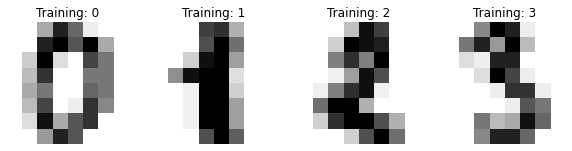

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

#Flatten Image

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [9]:
data.shape

(1797, 64)

In [10]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

#Scaling Data

In [11]:
data.min()

0.0

In [12]:
data.max()

16.0

In [13]:
data = data/16

#Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size = 0.3, random_state = 192529)

#Import Random Forest Classfier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train, y_train)

RandomForestClassifier()

#Predict Test Data

In [19]:
y_pred = rf.predict(X_test)

In [20]:
y_pred

array([7, 4, 4, 0, 3, 0, 5, 1, 4, 2, 9, 1, 5, 6, 6, 2, 5, 8, 3, 9, 2, 1,
       4, 6, 6, 2, 8, 3, 4, 8, 3, 7, 8, 8, 2, 8, 1, 6, 4, 8, 8, 7, 0, 2,
       5, 8, 9, 9, 9, 6, 4, 6, 6, 9, 7, 8, 9, 1, 9, 4, 4, 3, 6, 0, 9, 0,
       4, 2, 5, 7, 2, 7, 0, 8, 7, 9, 9, 3, 5, 5, 7, 5, 2, 0, 2, 4, 5, 8,
       5, 2, 4, 1, 6, 3, 8, 2, 8, 3, 4, 9, 4, 9, 4, 1, 4, 6, 5, 5, 6, 5,
       4, 4, 8, 4, 8, 1, 6, 4, 2, 2, 6, 1, 0, 3, 0, 2, 8, 3, 0, 8, 5, 4,
       5, 3, 6, 8, 4, 4, 6, 7, 5, 3, 9, 3, 0, 8, 7, 3, 2, 9, 4, 5, 6, 9,
       6, 0, 6, 8, 0, 9, 9, 2, 1, 7, 6, 5, 9, 3, 3, 5, 6, 4, 4, 7, 1, 6,
       1, 6, 8, 8, 9, 0, 3, 5, 0, 1, 4, 6, 9, 2, 8, 9, 3, 5, 0, 6, 1, 0,
       0, 2, 4, 4, 5, 0, 4, 4, 7, 9, 2, 9, 6, 4, 1, 2, 0, 7, 3, 7, 9, 8,
       4, 3, 8, 9, 8, 6, 2, 7, 5, 1, 9, 9, 1, 3, 8, 3, 4, 6, 9, 7, 7, 2,
       1, 7, 3, 3, 5, 9, 6, 7, 7, 7, 1, 0, 1, 7, 7, 4, 8, 2, 5, 7, 0, 2,
       7, 0, 0, 9, 1, 1, 7, 7, 1, 6, 1, 9, 6, 9, 6, 6, 2, 9, 2, 5, 4, 6,
       5, 3, 1, 0, 9, 8, 2, 5, 7, 5, 5, 4, 2, 2, 1,

#Evaluate Model

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 52,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 62,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 57]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      1.00      0.98        51
           2       1.00      1.00      1.00        50
           3       1.00      0.95      0.97        60
           4       0.98      0.98      0.98        56
           5       0.95      0.96      0.95        54
           6       1.00      1.00      1.00        62
           7       0.94      1.00      0.97        49
           8       1.00      0.92      0.96        52
           9       0.97      0.98      0.97        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

